In [2]:
# !pip install xclim 

In [3]:
%matplotlib inline 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os 
import gcsfs 
from matplotlib import cm
import warnings 

from science_validation_manual import *

In [4]:
import dask
import dask.array as da
import dask.distributed as dd
import rhg_compute_tools.kubernetes as rhgk

/srv/conda/envs/notebook/lib/python3.8/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [5]:
client, cluster = rhgk.get_standard_cluster()

In [6]:
cluster

In [7]:
dtr_hist = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')
# dtr_ssp126 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp126/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')
dtr_ssp245 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')
dtr_ssp370 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg/ssp370/r1i1p1f1/day/dtr/gr/v20211229154259.zarr')
# dtr_ssp585 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp585/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')

In [54]:
dtr_coarse = read_gcs_zarr('gs://scratch-170cd6ec/3776e913-ca64-426c-8d13-784cdb246d81/biascorrectdownscale-g4qfl-619705947/rechunked.zarr')
dtr_fine = read_gcs_zarr('gs://scratch-170cd6ec/3776e913-ca64-426c-8d13-784cdb246d81/biascorrectdownscale-g4qfl-2882933105/rechunked.zarr')

In [58]:
dtr_hist_cmip6 = read_gcs_zarr('gs://clean-b1dbca25/cmip6/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/dtr/gn/v20191016.zarr')
dtr_ssp245_cmip6 = read_gcs_zarr('gs://clean-b1dbca25/cmip6/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/dtr/gn/v20191016.zarr')
dtr_ssp370_cmip6 = read_gcs_zarr('gs://clean-b1dbca25/cmip6/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/dtr/gn/v20191016.zarr')

In [29]:
dtr_bc_hist = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/MIROC/MIROC6/historical/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')
dtr_bc_ssp245 = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/MIROC/MIROC6/ssp245/r1i1p1f1/day/dtr/gn/v20211217001519.zarr')
dtr_bc_ssp370 = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/EC-Earth-Consortium/EC-Earth3-Veg/ssp370/r1i1p1f1/day/dtr/gr/v20211229154259.zarr')

In [30]:
da_bc_hist = dtr_bc_hist['dtr'].sel(time=slice('1995', '2014')).mean('time').load()
da_bc_ssp370 = dtr_bc_ssp370['dtr'].sel(time=slice('2080', '2100')).mean('time').load()
da_bc_ssp245 = dtr_bc_ssp245['dtr'].sel(time=slice('2080', '2100')).mean('time').load()

In [8]:
da_hist = dtr_hist['dtr'].sel(time=slice('1995', '2014')).mean('time').load()
da_ssp370 = dtr_ssp370['dtr'].sel(time=slice('2080', '2100')).mean('time').load()
da_ssp245 = dtr_ssp245['dtr'].sel(time=slice('2080', '2100')).mean('time').load()

Text(0.5, 1.0, 'ssp370, 2080-2100')

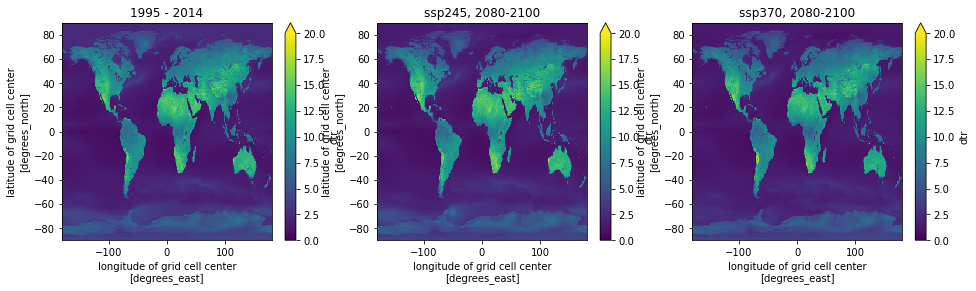

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
vmin = 0
vmax = 20
da_hist.plot(ax=axes[0], vmin=vmin, vmax=vmax)
axes[0].set_title('1995 - 2014')
da_ssp245.plot(ax=axes[1], vmin=vmin, vmax=vmax)
axes[1].set_title('ssp245, 2080-2100')
da_ssp370.plot(ax=axes[2], vmin=vmin, vmax=vmax)
axes[2].set_title('ssp370, 2080-2100')

Text(0, 0.5, 'downscaled              ')

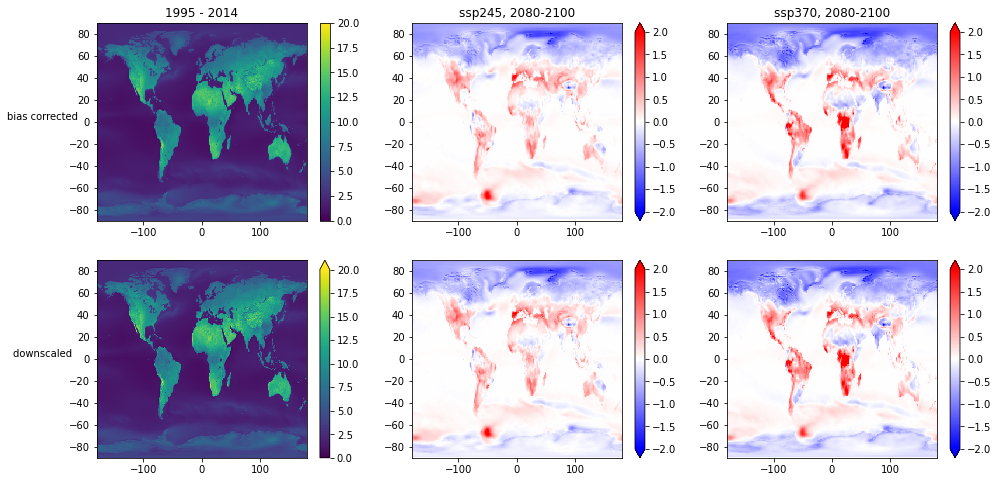

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
cmap = 'bwr'

da_bc_hist.plot(ax=axes[0,0], vmin=0, vmax=20, add_labels=False)
(da_bc_ssp245 - da_bc_hist).plot(ax=axes[0,1], cmap=cmap, vmin=-2, vmax=2, add_labels=False)
(da_bc_ssp370 - da_bc_hist).plot(ax=axes[0,2], cmap=cmap, vmin=-2, vmax=2, add_labels=False)

da_hist.plot(ax=axes[1,0], vmin=0, vmax=20, add_labels=False)
(da_ssp245 - da_hist).plot(ax=axes[1,1], cmap=cmap, vmin=-2, vmax=2, add_labels=False)
(da_ssp370 - da_hist).plot(ax=axes[1,2], cmap=cmap, vmin=-2, vmax=2, add_labels=False)

axes[0, 0].set_title('1995 - 2014')
axes[0, 1].set_title('ssp245, 2080-2100')
axes[0, 2].set_title('ssp370, 2080-2100')
axes[0, 0].set_ylabel('bias corrected              ', rotation='horizontal')
axes[1, 0].set_ylabel('downscaled              ', rotation='horizontal')

Text(0.5, 1.0, 'Miami DTR')

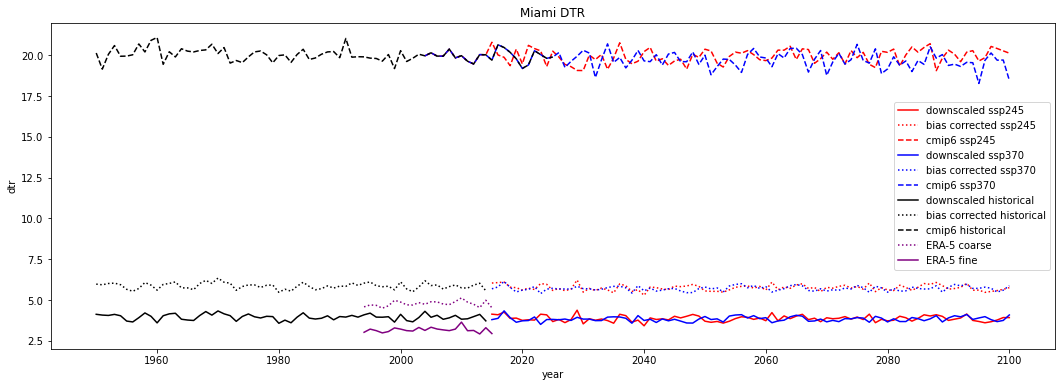

In [62]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# Miami 
target_lat = 25.76
target_lon = -80.19

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('Miami DTR')

Text(0.5, 1.0, 'St. Louis, MO DTR')

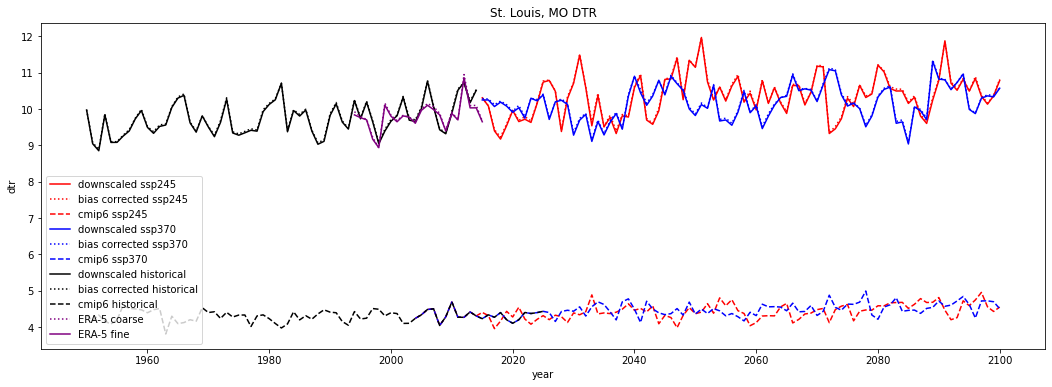

In [63]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# St Louis
target_lat = 38.627
target_lon = -90.1994

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('St. Louis, MO DTR')

Text(0.5, 1.0, 'Mumbai DTR')

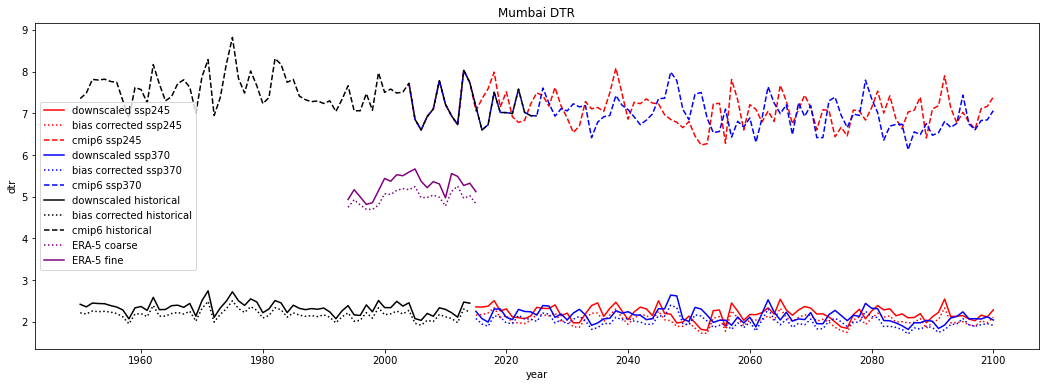

In [64]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# Mumbai
target_lat = 19.076090
target_lon = 72.877426

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('Mumbai DTR')

Text(0.5, 1.0, 'Seattle DTR')

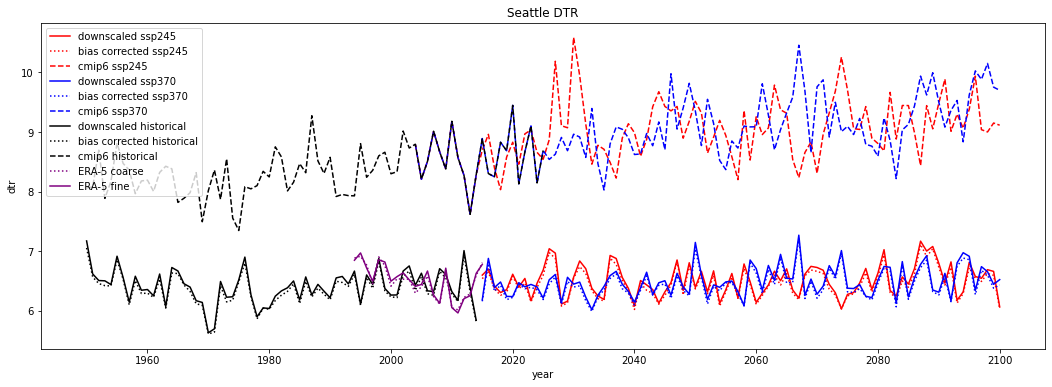

In [65]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# Seattle
target_lat = 47.608013
target_lon = -122.335167

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('Seattle DTR')

Text(0.5, 1.0, 'Oakland, CA DTR')

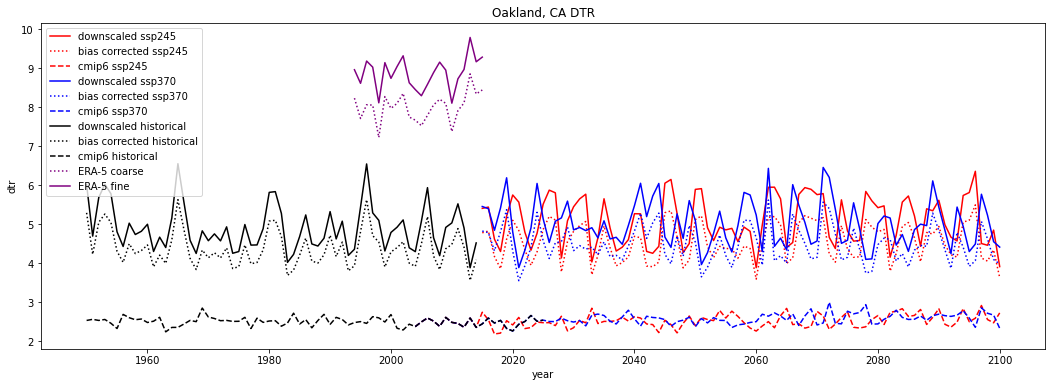

In [66]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# Oakland, CA
target_lat = 37.804363
target_lon = -122.271111

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('Oakland, CA DTR')

Text(0.5, 1.0, 'NYC DTR')

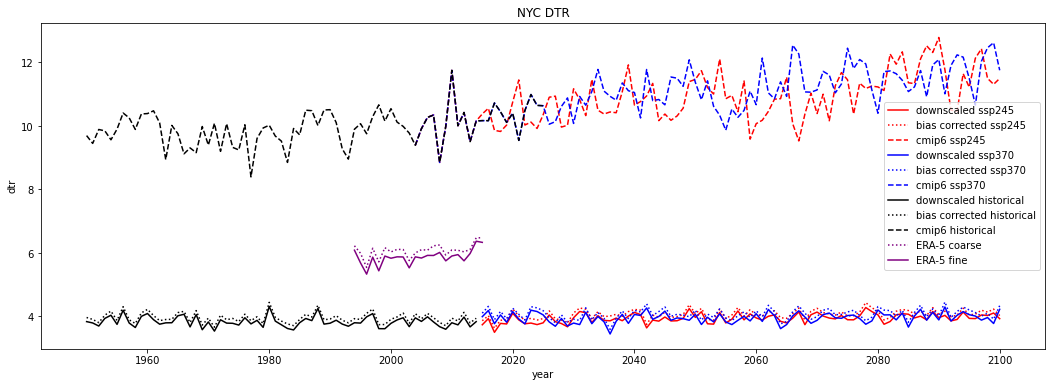

In [74]:
fig = plt.subplots(1, 1, figsize=(18, 6))
# NYC
target_lat = 40.7306
target_lon = -73.935242

dtr_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp245',
                                                                                                                color='red', linestyle='-')
dtr_bc_ssp245["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp245',
                                                                                                                  color='red', linestyle=':')
dtr_ssp245_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp245',
                                                                                                                  color='red', linestyle='--')

dtr_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled ssp370', 
                                                                                                                color='blue', linestyle='-')
dtr_bc_ssp370["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected ssp370', 
                                                                                                                color='blue', linestyle=':')
dtr_ssp370_cmip6["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 ssp370', 
                                                                                                                color='blue', linestyle='--')

dtr_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='downscaled historical', 
                                                                                                              color='black', linestyle='-')
dtr_bc_hist["dtr"].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='bias corrected historical', 
                                                                                                                 color='black', linestyle=':')
dtr_hist_cmip6['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='cmip6 historical', 
                                                                                                                 color='black', linestyle='--')

dtr_coarse['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 coarse', 
                                                                                                                 color='purple', linestyle=':')
dtr_fine['dtr'].sel(lon=target_lon, lat=target_lat, method="nearest").groupby('time.year').mean().load().plot(label='ERA-5 fine', 
                                                                                                                 color='purple', linestyle='-')

plt.legend()
plt.title('NYC DTR')